In [75]:
#from google.colab import drive
#drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from random import randrange
from numpy import linalg as LA
import math
from tqdm import tqdm
import csv
import pandas as pd

In [76]:
cat = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']  
trainData=[]
IMG_SIZE=32
imgPath='C:/Users/IMRAN/Desktop/_____Com vision/CIFAR10/train'
csvFile=pd.read_csv('C:/Users/IMRAN/Desktop/_____Com vision/CIFAR10/trainLabels.csv')
time=1
for img in tqdm(os.listdir(imgPath)):
    imgName=img.split(".") #get the image file name
    if(time>25000): #take only 25k img from CFAR10 for this task. for 50k image my kernel get auto shutdown after 6 hour training for no reason.
      break;
    index= int(imgName[0])
    catagory=cat.index(csvFile['label'][index-1])
    #print(img," ",catagory)
    oneImage = cv2.imread( os.path.join(imgPath, img), cv2.IMREAD_GRAYSCALE ) #read image and turn into grayscale
    img_resized = cv2.resize(oneImage, (IMG_SIZE, IMG_SIZE)) #resized image (32*32)
    trainData.append([oneImage,catagory]) #store data [[image, catagory]] sequence
    
    time +=1

 50%|█████████████████████████████████████▌                                     | 25000/50000 [01:32<01:32, 269.75it/s]


In [77]:
print(time-1)

25000


In [78]:
randomTrainData = trainData[:]
random.shuffle(randomTrainData) #randomaized total data set.

In [79]:
fold_size=5000
#create folds for cross validation
fold1 = randomTrainData[0:5000]
fold2 = randomTrainData[5000:10000]
fold3 = randomTrainData[10000:15000]
fold4 = randomTrainData[15000:20000]
fold5 = randomTrainData[20000:25000]

#prepare train set and validation set for cross validation.
set1 = fold1 + fold2 + fold3 + fold4
set1_validation = fold5

set2 = fold1 + fold2 + fold3 + fold5
set2_validation = fold4

set3 = fold1 + fold2 + fold4 + fold5
set3_validation = fold3

set4 = fold1 + fold3 + fold4 + fold5
set4_validation = fold2

set5 = fold2 + fold3 + fold4 + fold5
set5_validation = fold1

validation=[] #all the validation set store
train=[] #all the train set store

train.append(set1)
validation.append(set1_validation)

train.append(set2)
validation.append(set2_validation)

train.append(set3)
validation.append(set3_validation)

train.append(set4)
validation.append(set4_validation)

train.append(set5)
validation.append(set5_validation)

In [80]:

K=[] #store points for every validation fold [[k0-k19]]
for i in range(5):
    count=[0]*20 #store success value for every k
    for set_v in tqdm(validation[i]): 
      sumANDcatagoryANDimg=[] #store [[sumOfAllPixelValue, catagoryOfThatImage, thatImage]] this sequence.
      for s in train[i]: #for every image of train data(combined 4 fold).
        dis= np.abs(set_v[0] - s[0]) #manhattan distance calculate for every image of train data based on a single image of validation data
        sumation=np.sum(dis) # sum of every pixel value (32*32) after manhattan distance calculate.
        sANDcANDi=[sumation, s[1], s[0]] # create [[sumOfAllPixelValue, catagoryOfThatImage, thatImage]] sequence.
        sumANDcatagoryANDimg.append(sANDcANDi) # store every item(sANDcANDi).

      sumANDcatagoryANDimg.sort(key = lambda x: x[0]) #sorted list based on distance found by manhattan distance.

      c=[0]*10 #store catagory appears.
      sd=[0]*10 #store sum of image distance
      for j in range(20): #for k 0-19 value.
        c[sumANDcatagoryANDimg[j][1]]+=1 #take the nerest image catatogry and store in a list catagory=index of c[] 
        sd[sumANDcatagoryANDimg[j][1]]=sd[sumANDcatagoryANDimg[j][1]]+sumANDcatagoryANDimg[j][0]
                #store sum of every same catagory image appears in sorted 20 images

        maxCatagoryFound=[] #store which catagory appears max times. multiple catagory could be appears max times. 
        max_c_value=max(c) #find maximum times apper of any catagory for every k value
        
        
      #---------------- Block1 start -----------------------------   
            #To run block1, block2 must be commented.
            #Logic in block1 create more identical graph of the actual graph in the lecture slide.
        for mcf in range(10):
            if(c[mcf]==max_c_value): 
                maxCatagoryFound.append(mcf) #store catagory of maximum times appears.
                
        if(len(maxCatagoryFound)==1): #only one catagory appears max times.
            if(set_v[1]==maxCatagoryFound[0]): #checking max found catagory is equal to validation image catagory.
                count[j] +=1 #increment 1 for every matched found
        else: #multiple catagory appears max times.
            randValue=randrange(len(maxCatagoryFound)) #take random catagory from multiple max catagory found.
            if(set_v[1]==maxCatagoryFound[randValue]): #checking that catagory is equal to validation image catagory.
                count[j] +=1 #increment 1 for every matched found
      #---------------- Block1 end ---------------------------------  
       
        
      #---------------- Block2 start -------------------------------  
#             #to run block2, block1 must be commented.
#             #logic in block2 create a graph that is very less identical graph of the actual graph in the lecture slide.
#         for c_index in range(10):
#           if(c[c_index]==max_c_value):
#             maxCatagoryFound.append(c_index) #store catagory of maximum times appears.
#         if(len(maxCatagoryFound)==1): #only one catagory appears max times
#           if(set_v[1]==maxCatagoryFound[0]): #checking max found catagory is equal to validation image catagory.
#             count[j] +=1 # increment 1 for every matched found
#         else: #multiple catagory appears max times
#           minIndex=maxCatagoryFound[0]
#           minIndexSumValue=sd[minIndex]
#           for mi in range(1,len(maxCatagoryFound)): #find the lowest summation value of the catagories
#             if(minIndexSumValue>sd[maxCatagoryFound[mi]]):
#               minIndex=maxCatagoryFound[mi]
#               minIndexSumValue=sd[minIndex]
#           if(set_v[1]==minIndex): #check th lowest sum catagory matched with validation image catagory.
#             count[j] +=1 # increment 1 for every matched found
       #-------------- Block2 end -----------------------------------
    
    points=[] #store points for every validation fold [k0-k19]
    for j in range(20):#j=0
      points.append((count[j]/fold_size)*100) #convert the success value to success rate in 100%
    K.append(points)


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [43:30<00:00,  1.91it/s]


In [81]:
print(K)


[[21.4, 20.880000000000003, 21.8, 22.88, 22.96, 22.6, 23.14, 23.54, 23.68, 24.2, 23.84, 24.02, 24.02, 23.94, 24.16, 24.22, 24.48, 24.42, 24.4, 24.46], [22.42, 21.240000000000002, 22.32, 23.02, 22.919999999999998, 23.599999999999998, 24.58, 24.04, 24.72, 25.080000000000002, 24.64, 24.46, 24.84, 24.7, 24.560000000000002, 24.66, 24.4, 24.02, 24.82, 24.7], [22.0, 21.02, 21.48, 23.04, 22.439999999999998, 22.32, 22.98, 23.119999999999997, 23.119999999999997, 23.7, 23.44, 23.880000000000003, 23.74, 24.14, 24.0, 23.98, 23.64, 23.799999999999997, 23.78, 23.78], [22.720000000000002, 21.6, 21.9, 23.36, 24.060000000000002, 24.060000000000002, 24.3, 24.64, 25.040000000000003, 25.0, 24.92, 24.779999999999998, 24.54, 24.66, 24.62, 24.66, 24.740000000000002, 24.279999999999998, 24.52, 24.42], [21.82, 21.4, 22.040000000000003, 22.5, 22.919999999999998, 22.919999999999998, 22.24, 22.66, 23.24, 23.380000000000003, 23.04, 23.599999999999998, 23.419999999999998, 23.56, 23.22, 23.78, 23.82, 24.08, 23.82, 23

<ipython-input-83-26af309d0d16>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


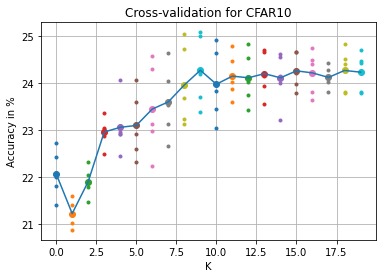

In [83]:
#y = [0,5,1,5,1,6,7,8,9,10]
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
p=[0]*20
for i in range(5):
    for j in range(20):
      p[j]=p[j]+K[i][j]/5 # calculate mid point for every validation fold for k0-k19
      plt.plot(j,K[i][j],'.') #plot all point

for i in range(20):
  plt.plot(i,p[i],'o') #plot mid point

plt.grid()
ax = plt.axes()
ax.plot(x, (p)) #draw line across mid points

plt.xlabel('K')
plt.ylabel('Accuracy in %')
plt.title('Cross-validation for CFAR10')
  
plt.show()